In [1]:
import pandas as pd
import numpy as np
import seaborn as sb

import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']= 'Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

In [31]:
df = pd.read_csv('a.csv',index_col='label')
df

,eng,kor,math
label,,,
aa,30,70,100
bb,60,30,50
cc,80,70,90
dd,90,60,65
ee,70,20,80


In [32]:
df.nlargest(3, 'kor')

,eng,kor,math
label,,,
aa,30,70,100
cc,80,70,90
dd,90,60,65


In [34]:
df['eng'].nlargest(3)

label
dd    90
cc    80
ee    70
Name: eng, dtype: int64

In [42]:
df.loc['bb','eng']=70
df

,eng,kor,math
label,,,
aa,30,70,100
bb,70,30,50
cc,80,70,90
dd,90,60,65
ee,70,20,80


In [47]:
# df['eng'].nlargest(3, keep='last')
df['eng'].nlargest(3, keep='all')

label
dd    90
cc    80
bb    70
ee    70
Name: eng, dtype: int64

In [44]:
df['eng']

label
aa    30
bb    70
cc    80
dd    90
ee    70
Name: eng, dtype: int64

In [14]:
def fn( v):
    print('v=',v)
    print("===============")
    return v.sum() #v['aa']

In [17]:
df.apply( fn ,axis=1)

v= eng      30
kor      70
math    100
Name: aa, dtype: int64
v= eng     60
kor     30
math    50
Name: bb, dtype: int64
v= eng     80
kor     70
math    90
Name: cc, dtype: int64
v= eng     90
kor     60
math    65
Name: dd, dtype: int64
v= eng     70
kor     20
math    80
Name: ee, dtype: int64


label
aa    200
bb    140
cc    240
dd    215
ee    170
dtype: int64

In [9]:
birthDF = pd.read_csv('data/births.txt',header=None,index_col=0)
birthDF.columns = ['남아수','여아수']
birthDF.index.name ='년도'
birthDF

,남아수,여아수
년도,,
1880,90993,110491
1881,91954,100745
1882,107850,113688
1883,112321,104629
1884,129022,114445
...,...,...
2007,1919408,2072139
2008,1887234,2036289
2009,1832925,1979303


In [ ]:
1.남아수 총합을 구하시요
2.여아수 평균을 구하시요
3.남아수가 가장많은 년도와
남아수를 구하시요
4.2000년도 이후 데이터를
구하시요
5. 1995~ 2000 년도 데이터를
구하시요

In [19]:
birthDF['남아수'].sum()

161802441

In [21]:
birthDF.sum()['남아수']

161802441

In [23]:
birthDF['여아수'].mean()

1245399.2121212122

In [27]:
m = birthDF['남아수'].max()
birthDF[ birthDF['남아수']==m ][ ['남아수'] ]

,남아수
년도,
1957,2044160


In [29]:
birthDF.loc[2000:]

,남아수,여아수
년도,,
2000,1814601,1962406
2001,1799049,1941251
2002,1795206,1939815
2003,1825359,1973434
2004,1834145,1982794
2005,1845379,1994841
2006,1898463,2052377
2007,1919408,2072139
2008,1887234,2036289


In [30]:
birthDF.loc[1995:2000]

,남아수,여아수
년도,,
1995,1757927,1902832
1996,1752249,1893378
1997,1739806,1884122
1998,1765915,1910250
1999,1772632,1918809
2000,1814601,1962406


In [ ]:
6. 남아출생이 가장많은 top5
를 구하시요(년도와 남아수)
7. 남아율(%) 컬럼을 추가하고 각년도별
남아수가 차지하는비율을 데이터로
보여주시요.
8. 2000년도 이후데이터 에 대해
출생량 컬럼을 추가하고
남아수가 1800000 이상이면 '많음'아니면 '적음'
이라고 보여 주시요
	남아수 출생량
2000   1233   '많음'
2001   1234   '적음'
9.1800년대,1900년대,2000년대 
각 남아,여야수 평균을 구하시요

In [49]:
birthDF['남아수'].nlargest(5)

년도
1957    2044160
1959    2023044
1960    2022093
1961    2017316
1958    2010884
Name: 남아수, dtype: int64

In [51]:
birthDF['남아율']=birthDF['남아수']/(birthDF['남아수']+birthDF['여아수'])

In [52]:
birthDF

,남아수,여아수,남아율
년도,,,
1880,90993,110491,0.451614
1881,91954,100745,0.477190
1882,107850,113688,0.486824
1883,112321,104629,0.517728
1884,129022,114445,0.529936
...,...,...,...
2007,1919408,2072139,0.480868
2008,1887234,2036289,0.481005
2009,1832925,1979303,0.480802


In [56]:
b2000 = birthDF.loc[2000:]
b2000['출생량']=b2000['남아수'].apply( lambda v: '많음' if v>=1800000 else '적음')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [58]:
b2000[['남아수','여아수','출생량']]

,남아수,여아수,출생량
년도,,,
2000,1814601,1962406,많음
2001,1799049,1941251,적음
2002,1795206,1939815,적음
2003,1825359,1973434,많음
2004,1834145,1982794,많음
2005,1845379,1994841,많음
2006,1898463,2052377,많음
2007,1919408,2072139,많음
2008,1887234,2036289,많음


In [63]:
b1800 = birthDF.loc[1800:1899][ ['남아수','여아수'] ]
b1900 = birthDF.loc[1900:1999][ ['남아수','여아수'] ]
b2000 = birthDF.loc[2000:][ ['남아수','여아수'] ]

In [67]:
b1800.mean()

남아수    176714.15
여아수    111820.55
dtype: float64

In [68]:
b1900.mean()

남아수    1362901.51
여아수    1384145.55
dtype: float64

In [70]:
b2000.mean().round(2)

남아수    1831500.58
여아수    1978477.50
dtype: float64

In [72]:
mydf = pd.DataFrame( [b1800.mean(),b1900.mean(),b2000.mean().round(2)])
mydf.index = ['1800년대평균','1900년대평균','2000년대평균']
mydf

,남아수,여아수
1800년대평균,176714.15,111820.55
1900년대평균,1362901.51,1384145.55
2000년대평균,1831500.58,1978477.50


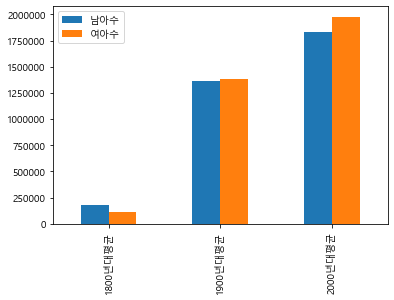

In [73]:
mydf.plot(kind='bar')
plt.show()